In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [3]:
# Load data
true = pd.read_csv('../Dataset_Original/ISOT/True.csv')
fake = pd.read_csv('../Dataset_Original/ISOT/Fake.csv')

In [4]:
# Combine data
true['label'] = 1
fake['label'] = 0
data = pd.concat([true, fake], axis=0, ignore_index=True)

# Data overview

In [5]:
# Data exploration
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
print(data['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


# Missing & duplicate values

In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
# Number of unique values in title
num_unique_values = data['title'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

38729/44898


In [9]:
# Number of unique values in text
num_unique_values = data['text'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

38646/44898


# Distribution of title length

In [10]:
data['title_length'] = data['title'].apply(len)
print(data['title_length'].describe())

count    44898.000000
mean        80.111720
std         25.379685
min          8.000000
25%         63.000000
50%         73.000000
75%         91.000000
max        286.000000
Name: title_length, dtype: float64


In [35]:
print(data[data['title_length']==8]['title'])

40350    Homepage
Name: title, dtype: object


In [36]:
print(data[data['title_length']==286]['title'])

37255    THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...
38848    THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...
43285    THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP...
Name: title, dtype: object


In [37]:
# Define a pattern for JavaScript code
pattern = r'<script.*?</script>'

# Find examples that contain JavaScript code
js_examples = data[data['text'].str.contains(pattern, regex=True, na=False)]

# Print the first few examples
print(js_examples.head())

                                                   title  \
40257  HELLO UNITED AIR LINES! Delta Just Paid A Woma...   

                                                    text    subject  \
40257  In case you haven t heard, a man was assaulted...  left-news   

               date  label  title_length  sentence_length  
40257  Apr 10, 2017      0            84             5847  


# Distribution of news length

In [11]:
data['sentence_length'] = data['text'].apply(len)
print(data['sentence_length'].describe())

count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: sentence_length, dtype: float64


In [12]:
# Describe 'sentence_length' for label 0
print(data[data['label'] == 0]['sentence_length'].describe())

# Describe 'sentence_length' for label 1
print(data[data['label'] == 1]['sentence_length'].describe())

count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: sentence_length, dtype: float64
count    21417.000000
mean      2383.278517
std       1684.835730
min          1.000000
25%        914.000000
50%       2222.000000
75%       3237.000000
max      29781.000000
Name: sentence_length, dtype: float64


## Below 10 characters

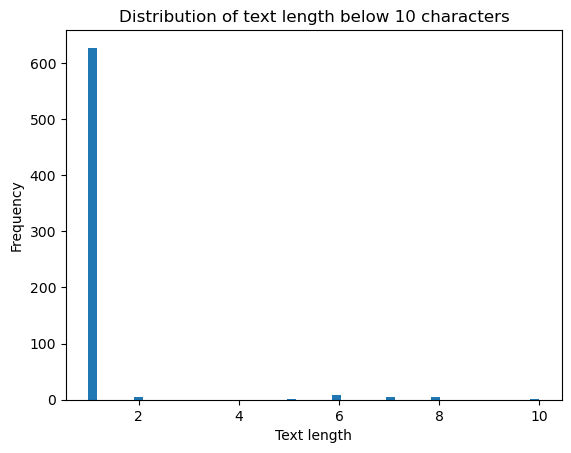

In [13]:
plt.hist(data['sentence_length'], bins=50, range=[1, 10])
plt.title('Distribution of text length below 10 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [14]:
print(data[data['sentence_length']<10])

                                                   title    text  \
8970                      Graphic: Supreme Court roundup           
32340  TAKE OUR POLL: Who Do You Think President Trum...           
32458  Joe Scarborough BERATES Mika Brzezinski Over “...           
32534  MY FAVORITE EXCUSES…Featuring Hillary Rotten C...  Enjoy:   
32607  WATCH TUCKER CARLSON Scorch Sanctuary City May...           
...                                                  ...     ...   
43233  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...           
43243  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...           
43244  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...           
43274  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...           
43290  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...           

            subject            date  label  title_length  sentence_length  
8970   politicsNews  June 16, 2016       1            30                1  
32340      politics    May 10, 

In [15]:
print(data['text'].loc[32534])

Enjoy:


In [16]:
print(data['text'].loc[32340])

## From 10 to 100 characters

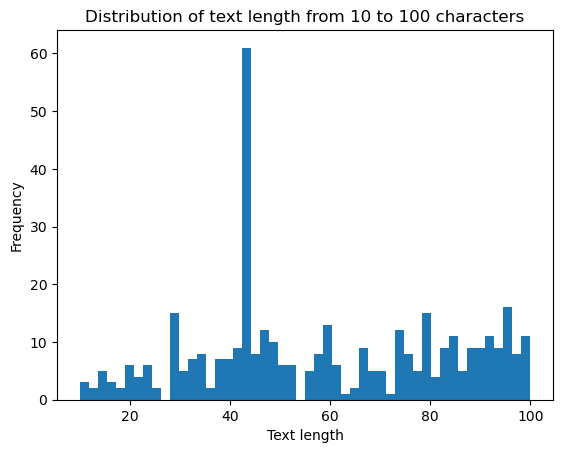

In [17]:
plt.hist(data['sentence_length'], bins=50, range=[10, 100])
plt.title('Distribution of text length from 10 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(data[data['sentence_length']==43]['text'])

32668    https://www.youtube.com/watch?v=cJZFepSvxzM
32703    https://www.youtube.com/watch?v=-7Tn4gi_Os8
32732    https://www.youtube.com/watch?v=SH0pRtK9sAE
32733    https://www.youtube.com/watch?v=DRLVvYzG46w
32745    https://www.youtube.com/watch?v=Ws5ojb0PCCo
32804    https://www.youtube.com/watch?v=P-TBfkqk7gU
32909    https://www.youtube.com/watch?v=n9tfNMQpYWU
32930    https://www.youtube.com/watch?v=PjeOoJyPNCk
32987    https://www.youtube.com/watch?v=J4LjxrOfEF8
33043    https://www.youtube.com/watch?v=uCS4RB9G13M
33065    THIS IS OUTRAGEOUS! YOU WON T BELIEVE THIS!
33106    https://www.youtube.com/watch?v=ISm-p8e-D7I
33112    https://www.youtube.com/watch?v=VkRCtn0nEvU
33129    https://www.youtube.com/watch?v=8Mehk5eWcZA
33141    https://www.youtube.com/watch?v=rUr8pYr5AXs
33147    https://www.youtube.com/watch?v=zZ7GrEItGoo
33211    https://www.youtube.com/watch?v=gqxwF-TeYas
33221    https://www.youtube.com/watch?v=aHkNzBRqPCE
33245    https://www.youtube.com/watch?v=EOr9f

## Above 100 characters

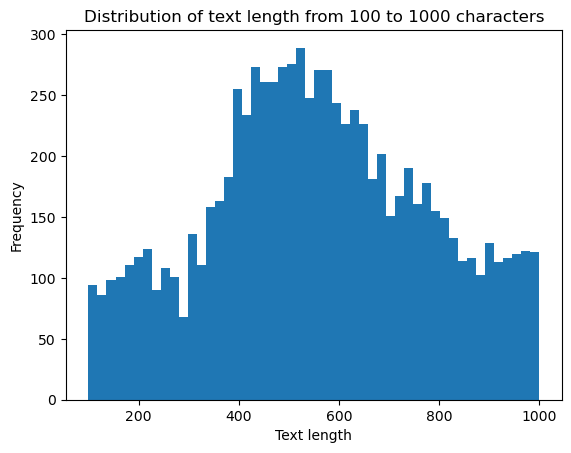

In [19]:
plt.hist(data['sentence_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

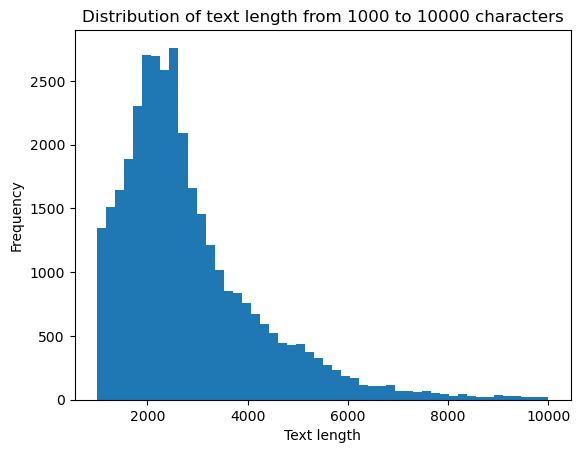

In [20]:
plt.hist(data['sentence_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

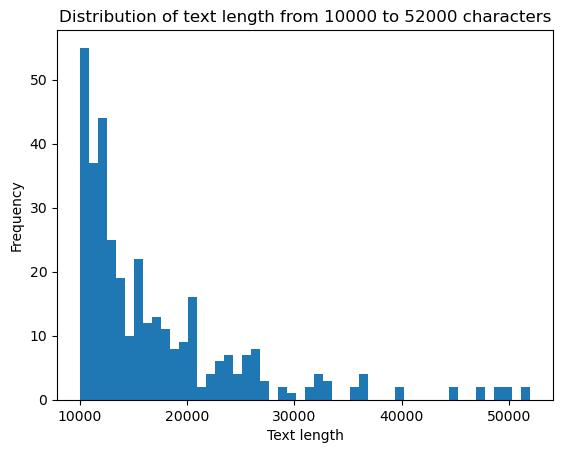

In [21]:
plt.hist(data['sentence_length'], bins=50, range=[10000, 52000])
plt.title('Distribution of text length from 10000 to 52000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

## Sentence length and label correlation

In [22]:
# Filter the DataFrame for examples where the text below 100 characters
long_texts = data[data['text'].str.len() < 100]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
0    1039
1       1
Name: count, dtype: int64


In [23]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[(data['text'].str.len() >= 100) & (data['text'].str.len() <= 1000)]
# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    5631
0    2784
Name: count, dtype: int64


In [24]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[data['text'].str.len() > 10000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
0    328
1     24
Name: count, dtype: int64


In [25]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[data['text'].str.len() > 30000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
0    27
Name: count, dtype: int64


# Wordcloud of news titles & texts

In [26]:
# Join all the text in 'title' into a single string
true_title = ' '.join(data[data['label']==1]['title'])
true_text = ' '.join(data[data['label']==1]['text'])
fake_title = ' '.join(data[data['label']==0]['title'])
fake_text = ' '.join(data[data['label']==0]['text'])

In [27]:
# Plot function
def plot_wordcloud(type):
    wordcloud = WordCloud(width=800, height=600,
                        background_color='white',
                        stopwords=None,
                        min_font_size=10).generate(type)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

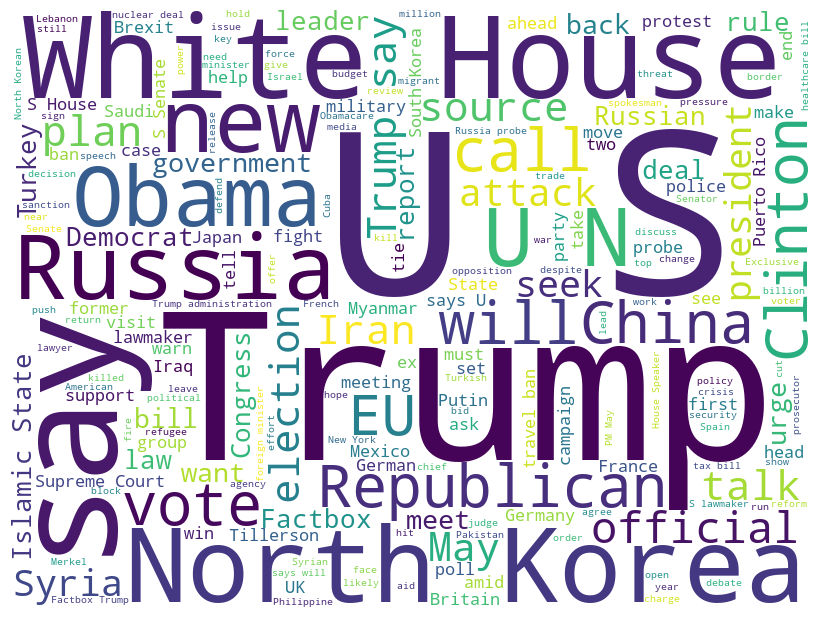

In [28]:
plot_wordcloud(true_title)

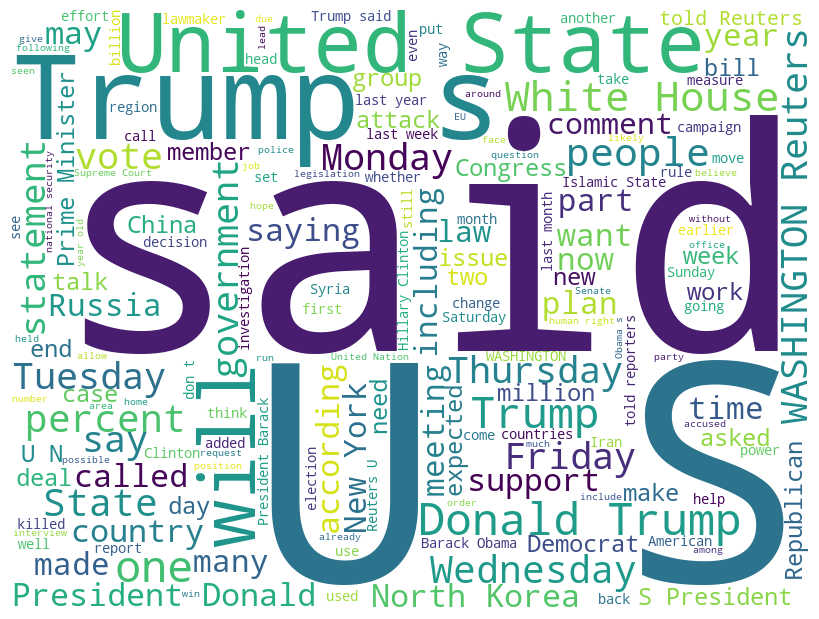

In [29]:
plot_wordcloud(true_text)

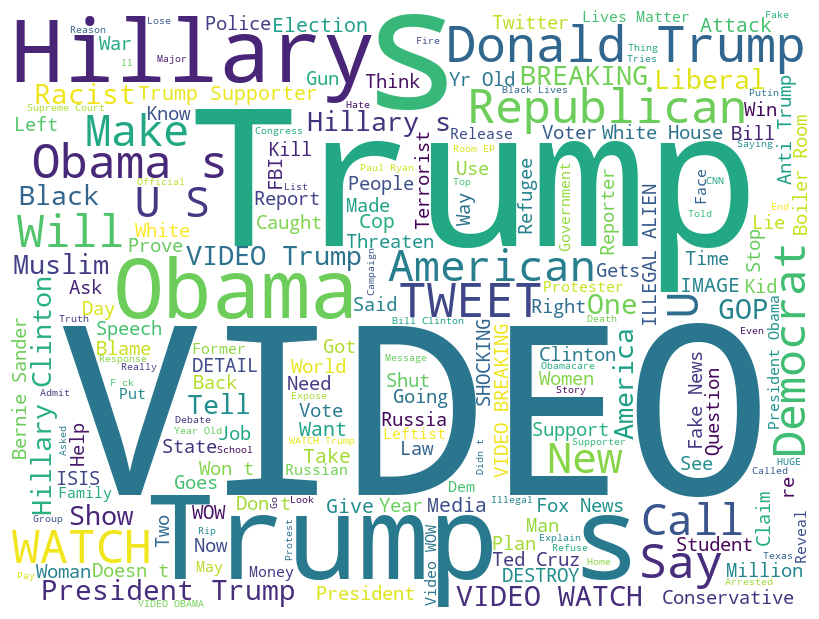

In [30]:
plot_wordcloud(fake_title)

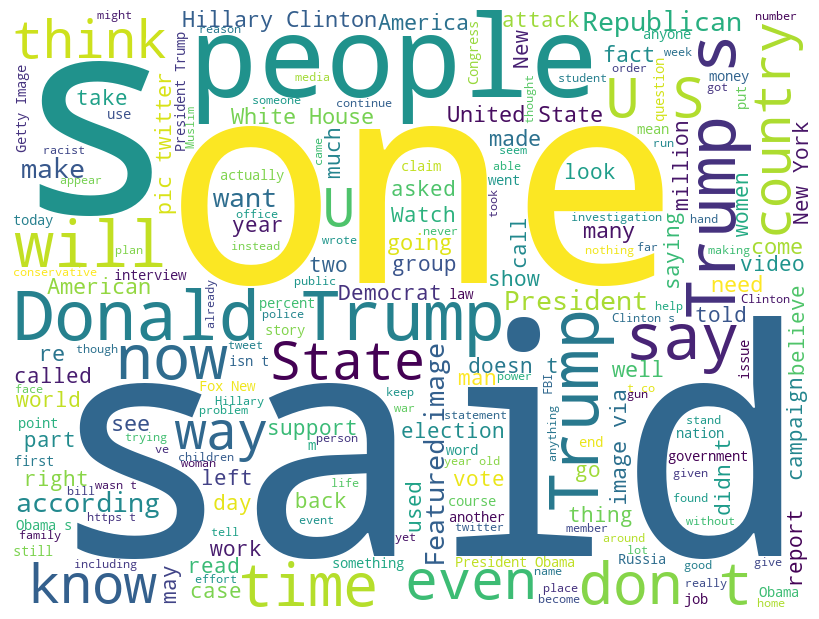

In [31]:
plot_wordcloud(fake_text)